# ОИАД. Лабораторная работа №4

Используйте набор данных **datasets/famcs_students.csv**

binary_cols = [ss, interest, weekend_study, bad_sleep, glasses, anime, study_form, literature]

Исползуйте целевую переменную $y=$ binary_cols[N % 8], где $N$ - номер в списке группы. Остальные переменные используйте в качестве признаков $X$ (предикторов). Вы можете отобрать наиболее информативные (по вашему экспертному мнению) признаки, но не менее 5.

Необходимо построить несколько моделей бинарной классификации $y$ по признакам $X$.

Разделите случайно исходные данные на 3 выборки:
* тренировочная (70%) - для определения параметров модели
* валидацонная (15%) - для подбора гиперпараметров модели
* тестовую (15%) - итоговая оценка качества

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок
  

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
pd.options.display.max_columns = 60

In [27]:
df = pd.read_csv("../datasets/famcs_students.csv")
df

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,glasses,work_experience,ai,height,anime,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,Нет,Меньше года,Cursor,192.0,Нет,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.20,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,Нет,1-2 года,Mistral,169.0,Нет,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.80,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,Нет,Меньше года,ChatGPT,190.0,Нет,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.80,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,Нет,1-2 года,Qwen,158.0,Нет,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.80,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,Нет,Не работаю,DeepSeek,187.0,Нет,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.00,0,"Нет, я из Минска",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Нет,Нет,Да,Не работаю,ChatGPT,185.0,Да,Экстраверт,Вообще нет,1.0,Бюджет,45.0,Карие,6.29,0,"Нет, я из Минска",Да
123,4,1,Информатика,Ж,22.0,Нет,Программирование,Windows,Да,Да,Да,Не работаю,ChatGPT,169.0,Нет,Интроверт,"Редко, легкая физкультура",0.0,Бюджет,39.0,Карие,6.00,0,"Нет, я из регионов",Нет
124,4,1,Информатика,М,21.0,Нет,Математика,Windows,Нет,Нет,Да,Не работаю,DeepSeek,183.0,Нет,Экстраверт,"Да, я спортсмен",10.0,Бюджет,44.0,Карие,7.00,0,"Нет, я из Минска",Нет
125,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Да,Да,Нет,1-2 года,ChatGPT,187.0,Да,Интроверт,"Да, я спортсмен",1.0,Бюджет,45.0,Карие,7.00,0,"Нет, я из регионов",Нет


In [28]:
encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        df[col], uniques = pd.factorize(df[col])
        encoders[col] = uniques

In [29]:
binary_cols = ["ss", "interest", "weekend_study", "bad_sleep",
               "glasses", "anime", "study_form", "literature"]
N = 25
y_col = binary_cols[N % 8]
y = df[y_col].values
binary_cols[N % 8]

'interest'

In [30]:
# используем первые 6 бинарных признаков (минимум 5)
X_cols = ["group", "sex", "os","weekend_study", 
            "miss", "work_experience"]
X = df[X_cols].values
X

array([[11. ,  0. ,  0. ,  0. ,  3. ,  0. ],
       [11. ,  1. ,  0. ,  1. ,  5. ,  1. ],
       [11. ,  1. ,  0. ,  0. , 10. ,  0. ],
       [11. ,  1. ,  0. ,  0. ,  3. ,  1. ],
       [11. ,  0. ,  1. ,  0. ,  1. ,  2. ],
       [11. ,  0. ,  1. ,  0. ,  7. ,  1. ],
       [11. ,  0. ,  1. ,  1. , 12. ,  1. ],
       [11. ,  0. ,  1. ,  1. , 11. ,  0. ],
       [11. ,  0. ,  1. ,  0. ,  4. ,  0. ],
       [11. ,  0. ,  1. ,  0. ,  3. ,  2. ],
       [11. ,  0. ,  1. ,  1. , 11. ,  0. ],
       [11. ,  1. ,  1. ,  0. ,  3. ,  2. ],
       [11. ,  1. ,  1. ,  0. ,  0. ,  2. ],
       [11. ,  1. ,  0. ,  0. ,  1. ,  1. ],
       [11. ,  0. ,  0. ,  0. ,  6. ,  1. ],
       [11. ,  1. ,  1. ,  0. ,  2. ,  2. ],
       [11. ,  1. ,  0. ,  0. ,  5. ,  1. ],
       [11. ,  0. ,  1. ,  0. , 12. ,  1. ],
       [11. ,  0. ,  0. ,  0. ,  0. ,  3. ],
       [11. ,  0. ,  1. ,  0. ,  3. ,  2. ],
       [11. ,  0. ,  1. ,  0. ,  4. ,  2. ],
       [11. ,  1. ,  1. ,  0. ,  5. ,  0. ],
       [11

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=0)

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

In [32]:
class MajorityClassifier:
    def fit(self, y):
        vals, cnts = np.unique(y, return_counts=True)
        self.major = vals[np.argmax(cnts)]

    def predict(self, X):
        return np.full(len(X), self.major)


maj = MajorityClassifier()
maj.fit(y_train)

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

In [33]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}

        self.probs = {}
        for c in self.classes:
            X_c = X[y == c]
            self.probs[c] = (np.mean(X_c, axis=0) + 1e-6)

    def predict(self, X):
        preds = []
        for x in X:
            scores = {}
            for c in self.classes:
                p = self.priors[c]
                for i in range(len(x)):
                    p *= self.probs[c][i] ** x[i] * (1 - self.probs[c][i]) ** (1 - x[i])
                scores[c] = p
            preds.append(max(scores, key=scores.get))
        return np.array(preds)


nb = NaiveBayes()
nb.fit(X_train, y_train)

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

In [39]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        preds = []
        for x in X:
            dists = np.sqrt(np.sum((self.X - x)**2, axis=1))
            idx = np.argsort(dists)[:self.k]
            vals, cnts = np.unique(self.y[idx], return_counts=True)
            preds.append(vals[np.argmax(cnts)])
        return np.array(preds)


best_k = None
best_f1 = -1

for k in range(1, 16):
    knn_tmp = KNN(k)
    knn_tmp.fit(X_train, y_train)
    pred = knn_tmp.predict(X_valid)

    p = precision_score(y_valid, pred)
    r = recall_score(y_valid, pred)
    f1 = 2 * p * r / (p + r + 1e-6)

    if f1 > best_f1:
        best_f1 = f1
        best_k = k

knn = KNN(best_k)
knn.fit(X_train_scaled, y_train)

## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

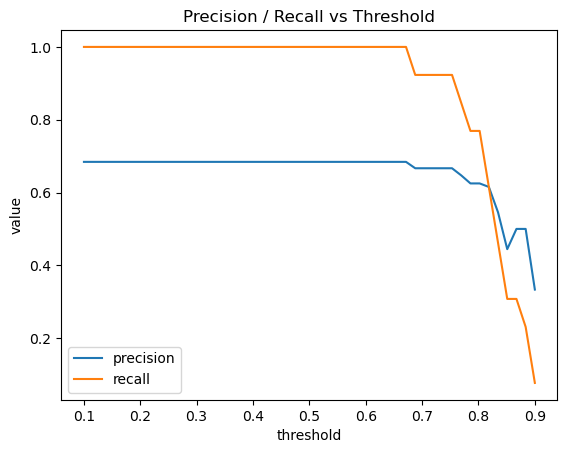

In [41]:
class LogisticRegression:
    def __init__(self, lr=0.1, iters=2000):
        self.lr = lr
        self.iters = iters

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for _ in range(self.iters):
            z = X @ self.w + self.b
            p = self.sigmoid(z)
            dw = X.T @ (p - y) / len(y)
            db = np.mean(p - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid(X @ self.w + self.b)

    def predict(self, X, thr=0.5):
        return (self.predict_proba(X) >= thr).astype(int)


lr = LogisticRegression()
lr.fit(X_train, y_train)

# подбор порога по F1
ths = np.linspace(0.1, 0.9, 50)
prec_list, rec_list, f1_list = [], [], []

for t in ths:
    pr = lr.predict(X_valid, thr=t)
    p = precision_score(y_valid, pr)
    r = recall_score(y_valid, pr)
    f1 = 2*p*r/(p+r+1e-6)

    prec_list.append(p)
    rec_list.append(r)
    f1_list.append(f1)

best_thr = ths[np.argmax(f1_list)]

# График
plt.plot(ths, prec_list, label="precision")
plt.plot(ths, rec_list, label="recall")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("value")
plt.title("Precision / Recall vs Threshold")
plt.show()

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок

In [37]:
models = {
    "Majority": maj.predict(X_test),
    "Naive Bayes": nb.predict(X_test),
    "KNN": knn.predict(X_test_scaled),
    "LogReg": lr.predict(X_test_scaled, thr=best_thr)
}

for name, pred in models.items():
    print("\n=== ", name, " ===")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    
    # LogReg has proba
    if name == "LogReg":
        proba = lr.predict_proba(X_test_scaled)
    else:
        proba = pred  # no probability → use class as score
    
    try:
        print("ROC-AUC:", roc_auc_score(y_test, proba))
    except:
        print("ROC-AUC: N/A")
    
    print("Confusion matrix:")
    print(confusion_matrix(y_test, pred))


===  Majority  ===
Accuracy: 0.95
Precision: 0.95
Recall: 1.0
ROC-AUC: 0.5
Confusion matrix:
[[ 0  1]
 [ 0 19]]

===  Naive Bayes  ===
Accuracy: 0.45
Precision: 0.9
Recall: 0.47368421052631576
ROC-AUC: 0.23684210526315788
Confusion matrix:
[[ 0  1]
 [10  9]]

===  KNN  ===
Accuracy: 0.95
Precision: 0.95
Recall: 1.0
ROC-AUC: 0.5
Confusion matrix:
[[ 0  1]
 [ 0 19]]

===  LogReg  ===
Accuracy: 0.95
Precision: 0.95
Recall: 1.0
ROC-AUC: 0.8947368421052632
Confusion matrix:
[[ 0  1]
 [ 0 19]]
